Dodanie bibliotek

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datacompy

# narzedzia
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    RepeatedStratifiedKFold,
    GridSearchCV
)
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree

# modele + Smote
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Wczytanie danych oraz prezentacja

In [2]:
# dataset.py.df()
df = pd.read_csv("D:/ml/xgboost-main/data/ssh_logs/SSH.csv")
df = df.drop(columns=["user", "ts"])
print(df.columns)
df.head()

Index(['is_private', 'is_failure', 'is_root', 'is_valid', 'not_valid_count',
       'ip_failure', 'ip_success', 'no_failure', 'first', 'td', 'target'],
      dtype='object')


,is_private,is_failure,is_root,is_valid,not_valid_count,ip_failure,ip_success,no_failure,first,td,target
0,1,1,0,1,0,1,0,2,1,0,0
1,1,1,0,1,0,2,0,3,0,18,0
2,1,0,0,1,0,0,1,0,0,133,0
3,1,1,0,1,0,1,1,2,0,58,0
4,1,1,0,1,0,2,1,3,0,29,0


y1 jako dane wyjsciowe oraz X1 jako dane testowe do uczenia sie

In [3]:
""" features = ['is_private', 'is_failure', 'is_root', 'is_valid', 'not_valid_count',
       'ip_failure', 'ip_success', 'no_failure', 'first', 'td']
target = ['target']

X = df[features]
y = df[target]
 """
y = df["target"]
X = df.drop(columns=["target"])

przygotowanie probek testowych oraz do uczenia modelu

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
X_test.head()

(226, 10)
(57, 10)


,is_private,is_failure,is_root,is_valid,not_valid_count,ip_failure,ip_success,no_failure,first,td
183,1,0,0,1,0,0,10,0,0,17
252,1,0,0,1,0,0,30,0,0,270
57,1,0,0,1,0,0,3,0,0,14
23,1,1,0,1,0,1,0,3,1,0
28,1,1,0,1,0,1,0,12,1,0


In [46]:
# cross val z KFOLD
""" kf = KFold(n_splits=10)
for i, (train_index, test_index) in enumerate(kf.split(X1)):
    print(f"Fold {i}:")
    print(f"  Training dataset index: {train_index}")
    print(f"  Test dataset index: {test_index}") """

' kf = KFold(n_splits=10)\nfor i, (train_index, test_index) in enumerate(kf.split(X1)):\n    print(f"Fold {i}:")\n    print(f"  Training dataset index: {train_index}")\n    print(f"  Test dataset index: {test_index}") '

In [47]:
""" model_LR = LogisticRegression(                          #LR dla niezbalansowanych   
    random_state = 0,
    max_iter=100
    )  

model_LR_SMOTE = LogisticRegression(                    #LR dla zbalansowanych   
    random_state = 0,
    max_iter=100
    ) 

cv = KFold(n_samples = 10, shuffle=True, random_state=42)

cross_val_results = cross_val_score(model_LR, X_train, y_train, scoring="accuracy", cv=cv)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

cross_val_results2 = cross_val_score(model_LR, X_train_sm, y_train_sm, scoring="accuracy", cv=cv)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}') """

' model_LR = LogisticRegression(                          #LR dla niezbalansowanych   \n    random_state = 0,\n    max_iter=100\n    )  \n\nmodel_LR_SMOTE = LogisticRegression(                    #LR dla zbalansowanych   \n    random_state = 0,\n    max_iter=100\n    ) \n\ncv = KFold(n_samples = 10, shuffle=True, random_state=42)\n\ncross_val_results = cross_val_score(model_LR, X_train, y_train, scoring="accuracy", cv=cv)\nprint(f\'Cross-Validation Results (Accuracy): {cross_val_results}\')\nprint(f\'Mean Accuracy: {cross_val_results.mean()}\')\n\ncross_val_results2 = cross_val_score(model_LR, X_train_sm, y_train_sm, scoring="accuracy", cv=cv)\nprint(f\'Cross-Validation Results (Accuracy): {cross_val_results}\')\nprint(f\'Mean Accuracy: {cross_val_results.mean()}\') '

### SMOTE

Przed Counter({0: 170, 1: 56})
Po Counter({0: 170, 1: 170})


<Axes: xlabel='target'>

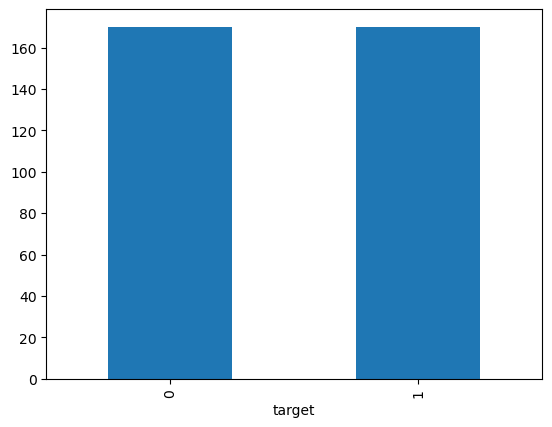

In [5]:
con = Counter(y_train)
print("Przed", con)
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
con1 = Counter(y_train_sm)
print("Po", con1)
pd.Series(y_train_sm).value_counts().plot.bar()

### Borderline SMOTE

Przed Counter({0: 170, 1: 56})
Po Counter({0: 170, 1: 170})


<Axes: xlabel='target'>

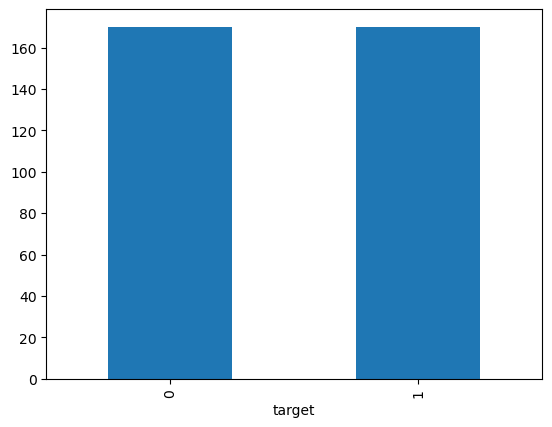

In [6]:
con3 = Counter(y_train)
print("Przed", con3)
brdsmote = BorderlineSMOTE(random_state=42)
X_train_bsm, y_train_bsm = brdsmote.fit_resample(X_train, y_train)
con4 = Counter(y_train_bsm)
print("Po", con4)
pd.Series(y_train_bsm).value_counts().plot.bar()

In [32]:
compare = datacompy.Compare(
#X_train,
X_train_sm,
X_train_bsm,
join_columns=['is_private', 'is_failure', 'is_root', 'is_valid', 'not_valid_count',
       'ip_failure', 'ip_success', 'no_failure', 'first', 'td'],
abs_tol=0.0001,
rel_tol=0,
#df1_name='oryginal',
df1_name='smote',
df2_name='boarderlinesmote'
)
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

          DataFrame  Columns  Rows
0             smote       10   340
1  boarderlinesmote       10   340

Column Summary
--------------

Number of columns in common: 10
Number of columns in smote but not in boarderlinesmote: 0
Number of columns in boarderlinesmote but not in smote: 0

Row Summary
-----------

Matched on: is_private, is_failure, is_root, is_valid, not_valid_count, ip_failure, ip_success, no_failure, first, td
Any duplicates on match values: Yes
Absolute Tolerance: 0.0001
Relative Tolerance: 0
Number of rows in common: 231
Number of rows in smote but not in boarderlinesmote: 109
Number of rows in boarderlinesmote but not in smote: 109

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 231

Column Comparison
-----------------

Number of columns compared with some values unequal: 0
Number of columns compared with all values equal: 10
Total numb

### GAN

### Model Prepare

In [10]:
# PARAMS
model_LR = LogisticRegression(  # logistic regression dla niezbalansowanych
    random_state=0, max_iter=100
)
model_LR_SMOTE = LogisticRegression(  # logistic regression dla zbalansowanych SMOTE
    random_state=0, max_iter=100
)
model_LR_BrdSMOTE = LogisticRegression(  # logistic regression dla zbalansowanych BoarderrLineSMOTE
    max_iter=100, random_state=0
)
model_RF = RandomForestClassifier(  # random forest dla niezbalansowanych
    n_estimators=20, max_depth=6, min_samples_leaf=1, random_state=0,
)
model_RF_SMOTE = RandomForestClassifier(  # random forest dla zbalansowanych SMOTE
    n_estimators=20, max_depth=6, min_samples_leaf=1, random_state=0,
)
model_RF_BrdSMOTE = RandomForestClassifier(  # random forest dla zbalansowanych BoarderrLineSMOTE
    n_estimators=20, max_depth=4, min_samples_leaf=1, random_state=0
)
model_DT = DecisionTreeClassifier(  # decision tree dla niezbalansowanych
    max_depth=6, min_samples_leaf=1, random_state=10
)
model_DT_SMOTE = DecisionTreeClassifier(  # decision tree dla zbalansowanych SMOTE
    max_depth=6, min_samples_leaf=1, random_state=10
)
model_DT_BrdSMOTE = DecisionTreeClassifier(  # decision tree dla zbalansowanych BoarderrLineSMOTE
    max_depth=4, min_samples_leaf=1, random_state=0
)
model_XGB = XGBClassifier(  # xgboost dla niezbalansowanych
    max_depth=4, subsample=0.6
)
model_XGB_SMOTE = XGBClassifier(  # xgboost dla zbalansowanych SMOTE
    max_depth=4, subsample=0.5
)
model_XGB_BrdSMOTE = XGBClassifier(  # xgboost dla zbalansowanych BoarderrLineSMOTE
    max_depth=4, subsample=1
)
model_XGB_RF = XGBRFClassifier(  # xgboost rf dla niezbalansowanych
    n_estimators=20, max_depth=4, subsample=0.9, random_state=10
)
model_XGB_RF_SMOTE = XGBRFClassifier(  # xgboost rf dla zbalansowanych SMOTE
    n_estimators=20, max_depth=4, subsample=1, random_state=0
)
model_XGB_RF_BrdSMOTE = XGBRFClassifier(  # xgboost rf dla zbalansowanych BoarderrLineSMOTE
    n_estimators=20, max_depth=4, subsample=0.9, random_state=0
)

# MODEL + TRENING
model_LR.fit(X_train, y_train)
model_LR_SMOTE.fit(X_train_sm, y_train_sm)
model_LR_BrdSMOTE.fit(X_train_bsm, y_train_bsm)

model_RF.fit(X_train, y_train)
model_RF_SMOTE.fit(X_train_sm, y_train_sm)
model_RF_BrdSMOTE.fit(X_train_bsm, y_train_bsm)

model_DT.fit(X_train, y_train)
model_DT_SMOTE.fit(X_train_sm, y_train_sm)
model_DT_BrdSMOTE.fit(X_train_bsm, y_train_bsm)

model_XGB.fit(X_train, y_train)
model_XGB_SMOTE.fit(X_train_sm, y_train_sm)
model_XGB_BrdSMOTE.fit(X_train_bsm, y_train_bsm)

model_XGB_RF.fit(X_train, y_train)
model_XGB_RF_SMOTE.fit(X_train_sm, y_train_sm)
model_XGB_RF_BrdSMOTE.fit(X_train_bsm, y_train_bsm)


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=4, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=20, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=0, reg_alpha=None, ...)

### Cross-Val-Score

#### Cross-val-score all models

In [ ]:
""" cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
goal = ['precision','f1','recall','accuracy']

for metrix1 in goal:
    
    cross_val_results = cross_val_score(model_LR, X_train, y_train, cv=cv, scoring=metrix1)
    print(f'LR Unbalanced Cross-Validation Results {metrix1}: {cross_val_results}')
    print(f'Mean {metrix1}: {cross_val_results.mean()}')
    print(f'Dev: {cross_val_results.std()}')

    cross_val_results2 = cross_val_score(model_LR_SMOTE, X_train_sm, y_train_sm, scoring=metrix1, cv=cv)
    print(f'LR Balanced Cross-Validation Results {metrix1}: {cross_val_results2}')
    print(f'Mean {metrix1}: {cross_val_results2.mean()}')
    print(f'Dev: {cross_val_results2.std()}')
    
    cross_val_results3 = cross_val_score(model_DT, X_train, y_train, scoring=metrix1, cv=cv)
    print(f'DT Unbalanced Cross-Validation Results {metrix1}: {cross_val_results3}')
    print(f'Mean {metrix1}: {cross_val_results3.mean()}')
    print(f'Dev: {cross_val_results3.std()}')

    cross_val_results4 = cross_val_score(model_DT_SMOTE, X_train_sm, y_train_sm, scoring=metrix1, cv=cv)
    print(f'DT Balanced Cross-Validation Results {metrix1}: {cross_val_results4}')
    print(f'Mean {metrix1}: {cross_val_results4.mean()}')
    print(f'Dev: {cross_val_results4.std()}')

    cross_val_results5 = cross_val_score(model_RF, X_train, y_train, scoring=metrix1, cv=cv)
    print(f'RF Unbalanced Cross-Validation Results {metrix1}: {cross_val_results5}')
    print(f'Mean {metrix1}: {cross_val_results5.mean()}')
    print(f'Dev: {cross_val_results5.std()}')

    cross_val_results6 = cross_val_score(model_RF_SMOTE, X_train_sm, y_train_sm, scoring=metrix1, cv=cv)
    print(f'RF Balanced Cross-Validation Results {metrix1}: {cross_val_results6}')
    print(f'Mean {metrix1}: {cross_val_results6.mean()}')
    print(f'Dev: {cross_val_results6.std()}')
    
    cross_val_results7 = cross_val_score(model_XGB, X_train, y_train, scoring=metrix1, cv=cv)
    print(f'XGBoost Unbalanced Cross-Validation Results {metrix1}: {cross_val_results7}')
    print(f'Mean {metrix1}: {cross_val_results7.mean()}')
    print(f'Dev: {cross_val_results7.std()}')

    cross_val_results8 = cross_val_score(model_XGB_SMOTE, X_train_sm, y_train_sm, scoring=metrix1, cv=cv)
    print(f'XGBoost Balanced Cross-Validation Results {metrix1}: {cross_val_results8}')
    print(f'Mean {metrix1}: {cross_val_results8.mean()}')
    print(f'Dev: {cross_val_results8.std()}')
    
    cross_val_results9 = cross_val_score(model_XGB_RF, X_train, y_train, scoring=metrix1, cv=cv)
    print(f'XGBoost RF Unbalanced Cross-Validation Results {metrix1}: {cross_val_results7}')
    print(f'Mean {metrix1}: {cross_val_results7.mean()}')
    print(f'Dev: {cross_val_results7.std()}')

    cross_val_results10 = cross_val_score(model_XGB_RF_SMOTE, X_train_sm, y_train_sm, scoring=metrix1, cv=cv)
    print(f'XGBoost RF Balanced Cross-Validation Results {metrix1}: {cross_val_results8}')
    print(f'Mean {metrix1}: {cross_val_results8.mean()}')
    print(f'Dev: {cross_val_results8.std()}') """

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LR Unbalanced Cross-Validation Results precision: [1.         1.         1.         0.625      0.83333333 1.
 1.         0.71428571 1.         0.83333333 1.         1.
 1.         0.85714286 0.625      1.         0.8        1.
 0.83333333 1.         1.         1.         1.         0.8
 0.83333333 1.         0.75       0.8        1.         0.8
 1.         0.83333333 1.         1.         1.         0.85714286
 0.75       0.71428571 1.         0.83333333 1.         0.83333333
 1.         1.         0.85714286 0.8        0.83333333 0.66666667
 1.         1.         1.         0.66666667 0.85714286 1.
 0.83333333 0.75       1.         0.71428571 1.         1.
 0.66666667 1.         1.         0.85714286 1.         1.
 0.83333333 0.66666667 0.8        1.         0.83333333 1.
 1.         0.8        1.         1.         0.8        1.
 0.625      1.         1.         0.71428571 1.         1.
 0.8        0.85714286 1.         1.         0.8        0.83333333
 0.75       0.83333333 1.      

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LR Balanced Cross-Validation Results precision: [1.         0.94444444 1.         0.85       0.94444444 0.89473684
 1.         0.88235294 1.         0.94117647 0.85       1.
 0.94736842 1.         0.94444444 0.84210526 1.         1.
 0.94117647 0.94444444 1.         0.94117647 0.9        1.
 1.         0.94444444 0.94117647 0.88888889 1.         0.94444444
 1.         0.85       0.94736842 0.94736842 0.94117647 1.
 0.94117647 0.9375     0.94117647 0.94117647 1.         1.
 1.         0.94736842 0.94444444 0.94444444 1.         0.85
 0.94444444 0.94444444 0.88888889 1.         1.         1.
 0.89473684 1.         0.89473684 0.94117647 1.         0.94444444
 0.94117647 0.94444444 1.         0.94736842 0.94117647 0.94444444
 0.94444444 0.94444444 0.94117647 1.         0.94444444 0.94444444
 0.94444444 0.94444444 0.89473684 1.         1.         1.
 0.94117647 0.94117647 1.         1.         1.         0.9
 1.         1.         0.88235294 1.         0.89473684 0.94444444
 0.84210526 1.  

KeyboardInterrupt: 

#### Cross-val-score one type of model

In [11]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
goal = ['precision','f1','recall','accuracy']
call = "+ BoarderLineSMOTE"

for metrix1 in goal:
    
    cross_val_results = cross_val_score(model_LR_BrdSMOTE, X_train_bsm, y_train_bsm, cv=cv, scoring=metrix1)
    print(f'LR {call} Cross-Validation Results {metrix1}: {cross_val_results}')
    print(f'Mean {metrix1}: {cross_val_results.mean()}')
    print(f'Dev: {cross_val_results.std()}')

    cross_val_results2 = cross_val_score(model_DT_BrdSMOTE, X_train_bsm, y_train_bsm, scoring=metrix1, cv=cv)
    print(f'DT {call} Cross-Validation Results {metrix1}: {cross_val_results2}')
    print(f'Mean {metrix1}: {cross_val_results2.mean()}')
    print(f'Dev: {cross_val_results2.std()}')
    
    cross_val_results3 = cross_val_score(model_RF_BrdSMOTE, X_train_bsm, y_train_bsm, scoring=metrix1, cv=cv)
    print(f'RF {call} Cross-Validation Results {metrix1}: {cross_val_results3}')
    print(f'Mean {metrix1}: {cross_val_results3.mean()}')
    print(f'Dev: {cross_val_results3.std()}')

    cross_val_results4 = cross_val_score(model_XGB_BrdSMOTE, X_train_bsm, y_train_bsm, scoring=metrix1, cv=cv)
    print(f'XGBoost {call} Cross-Validation Results {metrix1}: {cross_val_results4}')
    print(f'Mean {metrix1}: {cross_val_results4.mean()}')
    print(f'Dev: {cross_val_results4.std()}')

    cross_val_results5 = cross_val_score(model_XGB_RF_BrdSMOTE, X_train_bsm, y_train_bsm, scoring=metrix1, cv=cv)
    print(f'XGBoost RF {call} Cross-Validation Results {metrix1}: {cross_val_results5}')
    print(f'Mean {metrix1}: {cross_val_results5.mean()}')
    print(f'Dev: {cross_val_results5.std()}')

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LR + BoarderLineSMOTE Cross-Validation Results precision: [0.94117647 0.89473684 0.89473684 0.89473684 0.83333333 0.88235294
 0.89473684 0.80952381 1.         0.89473684 0.8        0.85
 1.         0.94444444 0.85       0.84210526 0.89473684 1.
 0.84210526 0.89473684 0.94444444 0.89473684 0.9375     0.89473684
 0.94444444 0.8        0.88888889 0.94444444 0.89473684 0.94117647
 0.89473684 0.94444444 0.83333333 0.85       0.89473684 0.85
 0.89473684 0.89473684 1.         0.89473684 0.94444444 0.89473684
 0.89473684 1.         1.         0.8        0.86666667 0.89473684
 0.9375     0.84210526 0.85       0.9375     1.         0.89473684
 0.94117647 1.         0.85       1.         0.85       0.77272727
 0.9375     0.94444444 0.89473684 0.88888889 0.84210526 0.84210526
 0.80952381 0.94444444 0.88888889 0.8        0.85       0.94444444
 0.80952381 0.88888889 0.89473684 0.94444444 0.9375     0.86666667
 0.89473684 0.89473684 0.84210526 0.77272727 1.         0.89473684
 1.         0.94444444 0

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LR + BoarderLineSMOTE Cross-Validation Results f1: [0.94117647 0.94444444 0.94444444 0.94444444 0.85714286 0.88235294
 0.94444444 0.89473684 1.         0.94444444 0.86486486 0.91891892
 0.96969697 0.97142857 0.91891892 0.88888889 0.94444444 1.
 0.88888889 0.94444444 0.97142857 0.94444444 0.90909091 0.94444444
 0.97142857 0.86486486 0.91428571 0.97142857 0.94444444 0.94117647
 0.94444444 0.97142857 0.85714286 0.91891892 0.94444444 0.91891892
 0.94444444 0.94444444 0.96969697 0.94444444 0.97142857 0.94444444
 0.94444444 1.         1.         0.86486486 0.8125     0.94444444
 0.90909091 0.88888889 0.91891892 0.90909091 1.         0.94444444
 0.94117647 1.         0.91891892 0.9375     0.91891892 0.87179487
 0.90909091 0.97142857 0.94444444 0.91428571 0.88888889 0.88888889
 0.89473684 0.97142857 0.91428571 0.86486486 0.91891892 0.97142857
 0.89473684 0.91428571 0.94444444 0.97142857 0.90909091 0.8125
 0.94444444 0.94444444 0.88888889 0.87179487 0.9375     0.94444444
 0.90322581 0.97142857 

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LR + BoarderLineSMOTE Cross-Validation Results recall: [0.94117647 1.         1.         1.         0.88235294 0.88235294
 1.         1.         1.         1.         0.94117647 1.
 0.94117647 1.         1.         0.94117647 1.         1.
 0.94117647 1.         1.         1.         0.88235294 1.
 1.         0.94117647 0.94117647 1.         1.         0.94117647
 1.         1.         0.88235294 1.         1.         1.
 1.         1.         0.94117647 1.         1.         1.
 1.         1.         1.         0.94117647 0.76470588 1.
 0.88235294 0.94117647 1.         0.88235294 1.         1.
 0.94117647 1.         1.         0.88235294 1.         1.
 0.88235294 1.         1.         0.94117647 0.94117647 0.94117647
 1.         1.         0.94117647 0.94117647 1.         1.
 1.         0.94117647 1.         1.         0.88235294 0.76470588
 1.         1.         0.94117647 1.         0.88235294 1.
 0.82352941 1.         1.         1.         1.         0.94117647
 0.82352941 0.882352

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LR + BoarderLineSMOTE Cross-Validation Results accuracy: [0.94117647 0.94117647 0.94117647 0.94117647 0.85294118 0.88235294
 0.94117647 0.88235294 1.         0.94117647 0.85294118 0.91176471
 0.97058824 0.97058824 0.91176471 0.88235294 0.94117647 1.
 0.88235294 0.94117647 0.97058824 0.94117647 0.91176471 0.94117647
 0.97058824 0.85294118 0.91176471 0.97058824 0.94117647 0.94117647
 0.94117647 0.97058824 0.85294118 0.91176471 0.94117647 0.91176471
 0.94117647 0.94117647 0.97058824 0.94117647 0.97058824 0.94117647
 0.94117647 1.         1.         0.85294118 0.82352941 0.94117647
 0.91176471 0.88235294 0.91176471 0.91176471 1.         0.94117647
 0.94117647 1.         0.91176471 0.94117647 0.91176471 0.85294118
 0.91176471 0.97058824 0.94117647 0.91176471 0.88235294 0.88235294
 0.88235294 0.97058824 0.91176471 0.85294118 0.91176471 0.97058824
 0.88235294 0.91176471 0.94117647 0.97058824 0.91176471 0.82352941
 0.94117647 0.94117647 0.88235294 0.85294118 0.94117647 0.94117647
 0.91176471 0

### Dobor parametrow przy pomocy GridSerach PC BOOM BOOM

In [59]:
params_LR = {                               # dla LR
    'max_iter': [100, 500, 1000],              # ilość iteracji
    'random_state': [0, 10, 20, 30, 40]        # ustalona losowość dla powtarzalności
}

params_DT = {                               # dla DT
    'estimator__max_depth': [4, 8, 12, 16],                # maksymalna głębokość drzewa
    'estimator__random_state': [0, 10, 20, 30, 40],         # ustalona losowość dla powtarzalności
    'estimator__min_samples_leaf': [1, 2]                  # minimalna ilość próbek liści
}

params_RF = {
    'estimator__n_estimators': [20, 40, 60, 80, 100],      # rozmiar lasu
    'estimator__max_depth': [4, 8, 12, 16],                # maksymalna głębokość drzewa
    'estimator__min_samples_leaf': [1, 2],                 # minimalna ilość próbek liści
    'estimator__random_state': [0, 10, 20, 30, 40],        # ustalona losowość dla powtarzalności
}

params_XGB = {                              # dla XGBoost
    'estimator__max_depth': [4, 8, 12, 16],                # maksymalna głębokość drzewa
    'estimator__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

params_XGB_RF = {                           # dla XGBoost RF
    'estimator__max_depth': [4, 8, 12, 16],                # maksymalna głębokość drzewa
    'estimator__n_estimators': [20, 40, 60, 80, 100],      # rozmiar lasu
    'estimator__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'estimator__random_state': [0, 10, 20, 30, 40]         # ustalona losowość dla powtarzalności
}

goal = ['precision', 'recall', 'f1', 'accuracy'] 

for score_1 in zip(goal):
    model_LR_BrdSMOTE = GridSearchCV(model_LR_BrdSMOTE,param_grid=params_LR,scoring=score_1, refit=score_1).fit(X_train_bsm,y_train_bsm)
    #model_DT_BrdSMOTE = GridSearchCV(model_DT_BrdSMOTE,param_grid=params_DT,scoring=score_1, refit=False).fit(X_train_bsm,y_train_bsm)
    #model_RF_BrdSMOTE = GridSearchCV(model_RF_BrdSMOTE,param_grid=params_RF,scoring=score_1, refit=False).fit(X_train_bsm,y_train_bsm)
    #model_XGB_BrdSMOTE = GridSearchCV(model_XGB_BrdSMOTE,param_grid=params_XGB, scoring=score_1, refit=False).fit(X_train_bsm,y_train_bsm)
    #model_XGB_RF_BrdSMOTE = GridSearchCV(model_XGB_RF_BrdSMOTE,param_grid=params_XGB_RF,scoring=score_1, refit=False).fit(X_train_bsm,y_train_bsm)
   
    print(f'Best parameters for {score_1} & LR + BorderLineSMOTE:', model_LR_BrdSMOTE.best_params_)
    print(f'Best score for {score_1} & LR + BorderLineSMOTE:', model_LR_BrdSMOTE.best_score_)
    print(f'Best parameters for {score_1} & DT + BorderLineSMOTE:', model_DT_BrdSMOTE.best_params_)
    print(f'Best score for {score_1} & DT + BorderLineSMOTE:', model_DT_BrdSMOTE.best_score_)
    print(f'Best parameters for {score_1} & RF + BorderLineSMOTE:', model_RF_BrdSMOTE.best_params_)
    print(f'Best score for {score_1} & RF + BorderLineSMOTE:', model_RF_BrdSMOTE.best_score_)
    print(f'Best parameters for {score_1} & XGB + BorderLineSMOTE:', model_XGB_BrdSMOTE.best_params_)
    print(f'Best score for {score_1} & XGB + BorderLineSMOTE:', model_XGB_BrdSMOTE.best_score_)
    print(f'Best parameters for {score_1} & XGB RF + BorderLineSMOTE:', model_XGB_RF_BrdSMOTE.best_params_)
    print(f'Best score for {score_1} & XGB RF + BorderLineSMOTE:', model_XGB_RF_BrdSMOTE.best_score_) 


InvalidParameterError: The 'refit' parameter of GridSearchCV must be an instance of 'bool', an instance of 'numpy.bool_' or an instance of 'int', an instance of 'str' or a callable. Got ('precision',) instead.

In [ ]:

# PARAMS to Search
params_LR = {                               # dla LR
    #'class_weight':['balanced', 'none'],   # wagi dla poszczegolnych klas
    'max_iter':[100,500,1000]  ,
    'random_state':[0,10,20,30,40]        # ustalona losowość dla powtarzalności
                # ilosc iteracji
}

params_DT = {                               # dla DT
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'random_state':[0,10,20,30,40],         # ustalona losowość dla powtarzalności
    'min_samples_leaf':[1,2]                # minimalna ilosc probek lisci
}

params_RF = {
    'n_estimators':[20,40,60,80,100],       # rozmiar lasu
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'min_samples_leaf':[1,2],               # minimalna ilosc probek lisci
    'random_state':[0,10,20,30,40],         # ustalona losowość dla powtarzalności
}

params_XGB = {                              # dla XGBoost
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'subsample':[0.5,0.6,0.7,0.8,0.9,1]
}

params_XGB_RF = {                           # dla XGBoost RF
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'n_estimators':[20,40,60,80,100],       # rozmiar lasu
    'subsample':[0.5,0.6,0.7,0.8,0.9,1],
    'random_state':[0,10,20,30,40]          # ustalona losowość dla powtarzalności
}

# All models Search

# analiza dla poszczegolnych celów
""" goal = [ "f1", "recall", "precision", "accuracy"]      #najlepsze parametryd dla wybranej metryki ('recall','f1','precision','accuracy')

for score_1 in goal:
    #model default
    #model_LR = GridSearchCV(model_LR,param_grid=params_LR,scoring=score_1).fit(X_train,y_train)
    #model_DT = GridSearchCV(model_DT,param_grid=params_DT,scoring=score_1).fit(X_train,y_train)
    #model_RF = GridSearchCV(model_RF,param_grid=params_RF,scoring=score_1).fit(X_train,y_train)
    #model_XGB = GridSearchCV(model_XGB,param_grid=params_XGB,scoring=score_1).fit(X_train,y_train)
    #model_XGB_RF = GridSearchCV(model_XGB_RF,param_grid=params_XGB_RF,scoring=score_1).fit(X_train,y_train)
    
    #model + SMOTE
    #model_LR_SMOTE = GridSearchCV(model_LR_SMOTE,param_grid=params_LR,scoring=score_1).fit(X_train_sm,y_train_sm)
    #model_DT_SMOTE = GridSearchCV(model_DT_SMOTE,param_grid=params_DT,scoring=score_1).fit(X_train_sm,y_train_sm)
    #model_RF_SMOTE = GridSearchCV(model_RF_SMOTE,param_grid=params_RF,scoring=score_1).fit(X_train_sm,y_train_sm)
    #model_XGB_SMOTE = GridSearchCV(model_XGB_SMOTE,param_grid=params_XGB,scoring=score_1).fit(X_train_sm,y_train_sm)
    #model_XGB_RF_SMOTE = GridSearchCV(model_XGB_RF_SMOTE,param_grid=params_XGB_RF,scoring=score_1).fit(X_train_sm,y_train_sm)
    
    #model + BoarderLineSMOTE
    LR_BrdSMOTE = GridSearchCV(model_LR_BrdSMOTE,param_grid=params_LR,scoring=score_1).fit(X_train_bsm,y_train_bsm)
    DT_BrdSMOTE = GridSearchCV(model_DT_BrdSMOTE,param_grid=params_DT,scoring=score_1).fit(X_train_bsm,y_train_bsm)
    RF_BrdSMOTE = GridSearchCV(model_RF_BrdSMOTE,param_grid=params_RF,scoring=score_1).fit(X_train_bsm,y_train_bsm)
    XGB_BrdSMOTE = GridSearchCV(model_XGB_BrdSMOTE,param_grid=params_XGB,scoring=score_1).fit(X_train_bsm,y_train_bsm)
    XGB_RF_BrdSMOTE = GridSearchCV(model_XGB_RF_SMOTE,param_grid=params_XGB_RF,scoring=score_1).fit(X_train_bsm,y_train_bsm)
    
    
    print(f'Goal: {score_1}')
    
    #model default
    print(f'Best parameters for {score_1} & LR :', model_LR.best_params_)
    print(f'Best score for {score_1} & LR:', model_LR.best_score_) 
    print(f'Best parameters for {score_1} & RF:', model_RF.best_params_)
    print(f'Best score for {score_1} & RF:', model_RF.best_score_)
    print(f'Best parameters for {score_1} & DT:', model_DT.best_params_)
    print(f'Best score for {score_1} & DT:', model_DT.best_score_)
    print(f'Best parameters for {score_1} & XGBoost:', model_XGB.best_params_)
    print(f'Best score for {score_1} & XGBoost:', model_XGB.best_score_)
    print(f'Best parameters for {score_1} & XGBoost RF:', model_XGB_RF.best_params_)
    print(f'Best score for {score_1} & XGBoost RF:', model_XGB_RF.best_score_)
    
    #model + SMOTE
    print(f'Best parameters for {score_1} & LR + SMOTE:', model_LR_SMOTE.best_params_)
    print(f'Best score for {score_1} & LR + SMOTE:', model_LR_SMOTE.best_score_)
    print(f'Best parameters for {score_1} & RF + SMOTE:', model_RF.best_params_)
    print(f'Best score for {score_1} & RF + SMOTE:', model_RF.best_score_)
    print(f'Best parameters for {score_1} & DT + SMOTE:', model_DT_SMOTE.best_params_)
    print(f'Best score for {score_1} & DT + SMOTE:', model_DT_SMOTE.best_score_) 
    print(f'Best parameters for {score_1} & XGBoost + SMOTE:', model_XGB_SMOTE.best_params_)
    print(f'Best score for {score_1} & XGBoost + SMOTE:', model_XGB_SMOTE.best_score_)
    print(f'Best parameters for {score_1} & XGBoost RF + SMOTE:', model_XGB_RF_SMOTE.best_params_)
    print(f'Best score for {score_1} & XGBoost RF + SMOTE:', model_XGB_RF_SMOTE.best_score_) 
    
    #model + BoarderLineSMOTE
    print(f'Best parameters for {score_1} & LR + BoarderLineSMOTE:', LR_BrdSMOTE.best_params_)
    print(f'Best score for {score_1} & LR + BoarderLineSMOTE:', LR_BrdSMOTE.best_score_)
    print(f'Best parameters for {score_1} & DT + BoarderLineSMOTE:', DT_BrdSMOTE.best_params_)
    print(f'Best score for {score_1} & DT + BoarderLineSMOTE:', DT_BrdSMOTE.best_score_)
    print(f'Best parameters for {score_1} & RF + BoarderLineSMOTE:', RF_BrdSMOTE.best_params_)
    print(f'Best score for {score_1} & RF + BoarderLineSMOTE:', RF_BrdSMOTE.best_score_)
    print(f'Best parameters for {score_1} & XGBoost + BoarderLineSMOTE:', XGB_BrdSMOTE.best_params_)
    print(f'Best score for {score_1} & XGBoost + BoarderLineSMOTE:', XGB_BrdSMOTE.best_score_)
    print(f'Best parameters for {score_1} & XGBoost RF + BoarderLineSMOTE:', XGB_RF_BrdSMOTE.best_params_)
    print(f'Best score for {score_1} & XGboost RF + BoarderLineSMOTE:', XGB_RF_BrdSMOTE.best_score_) """
    
    
    
    
    
    
    
    
    


# One model Search
# Dobor parametrow do analizy
""" params1 = {                               # dla LR
    'max_iter':[100,500,1000,1500]    ,           # ilosc iteracji
    #'class_weight':['balanced', 'none'],   # wagi dla poszczegolnych klas
    'random_state':[0,10,20,30,40]         # ustalona losowość dla powtarzalności
    
} """



#first all model default: RandomForest(), LogisticRegression(), etc.

call="BoarderLine SMOTE"
goal = ["precision", "f1","recall", "accuracy"] 

# Prezentacja wyników analizy
for score_2 in goal:
    
    model_LR = LogisticRegression()
    model_LR_SMOTE = LogisticRegression()
    model_LR_BrdSMOTE = LogisticRegression()
    model_DT = DecisionTreeClassifier()
    model_DT_SMOTE = DecisionTreeClassifier()
    model_DT_BrdSMOTE = DecisionTreeClassifier()
    model_RF = RandomForestClassifier()
    model_RF_SMOTE = RandomForestClassifier()
    model_RF_BrdSMOTE = RandomForestClassifier()
    model_XGB = XGBClassifier()
    model_XGB_SMOTE = XGBClassifier()
    model_XGB_BrdSMOTE = XGBClassifier()
    model_XGB_RF = XGBRFClassifier()
    model_XGB_RF_SMOTE = XGBRFClassifier()
    model_XGB_RF_BrdSMOTE = XGBRFClassifier()
    
    print(f'scoring: {score_2}')
    model_LR = GridSearchCV(model_LR,param_grid=params_LR,scoring=score_2).fit(X_train,y_train)
    model_LR_BrdSMOTE = GridSearchCV(model_LR_BrdSMOTE,param_grid=params_LR,scoring=score_2).fit(X_train_bsm,y_train_bsm)
    print('Best parameters LR:', model_LR.best_params_)
    print('Best score LR:', model_LR.best_score_)
    print(f'Best parameters LR + {call}:', model_LR_BrdSMOTE.best_params_)
    print('Best score:', model_LR_BrdSMOTE.best_score_)
    model_DT = GridSearchCV(model_DT,param_grid=params_DT,scoring=score_2).fit(X_train,y_train)
    model_DT_BrdSMOTE = GridSearchCV(model_DT_BrdSMOTE,param_grid=params_DT,scoring=score_2).fit(X_train_bsm,y_train_bsm)
    print('Best parameters DT:', model_DT.best_params_)
    print('Best score DT:', model_DT.best_score_)
    print(f'Best parameters DT + {call}:', model_DT_BrdSMOTE.best_params_)
    print('Best score:', model_DT_BrdSMOTE.best_score_)
    model_RF = GridSearchCV(model_RF,param_grid=params_RF,scoring=score_2).fit(X_train,y_train)
    model_RF_BrdSMOTE = GridSearchCV(model_RF_BrdSMOTE,param_grid=params_RF,scoring=score_2).fit(X_train_bsm,y_train_bsm)
    print('Best parameters RF:', model_RF.best_params_)
    print('Best score RF:', model_RF.best_score_)
    print(f'Best parameters RF + {call}:', model_RF_BrdSMOTE.best_params_)
    print('Best score:', model_RF_BrdSMOTE.best_score_)
    model_XGB = GridSearchCV(model_XGB,param_grid=params_XGB,scoring=score_2).fit(X_train,y_train)
    model_XGB_BrdSMOTE = GridSearchCV(model_XGB_BrdSMOTE,param_grid=params_XGB,scoring=score_2).fit(X_train_bsm,y_train_bsm)
    print('Best parameters XGBoost:', model_XGB.best_params_)
    print('Best score XGBoost:', model_XGB.best_score_)
    print(f'Best parameters XGBoost + {call}:', model_XGB_BrdSMOTE.best_params_)
    print('Best score:', model_XGB_BrdSMOTE.best_score_)
    model_XGB_RF = GridSearchCV(model_XGB_RF,param_grid=params_XGB_RF,scoring=score_2).fit(X_train,y_train)
    model_XGB_RF_BrdSMOTE = GridSearchCV(model_XGB_RF_SMOTE,param_grid=params_XGB_RF,scoring=score_2).fit(X_train_bsm,y_train_bsm)
    print('Best parameters XGBoost RF:', model_XGB.best_params_)
    print('Best score XGBoost RF:', model_XGB.best_score_)
    print(f'Best parameters XGBoost RF + {call}:', model_XGB_RF_BrdSMOTE.best_params_)
    print('Best score:', model_XGB_RF_BrdSMOTE.best_score_)

scoring: accuracy


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Best parameters LR: {'max_iter': 500, 'random_state': 0}
Best score LR: 0.9513043478260869
Best parameters LR + BoarderLine SMOTE: {'max_iter': 100, 'random_state': 0}
Best score: 0.967988064791134
Best parameters DT: {'max_depth': 4, 'min_samples_leaf': 1, 'random_state': 10}
Best score DT: 0.9955555555555555
Best parameters DT + BoarderLine SMOTE: {'max_depth': 4, 'min_samples_leaf': 1, 'random_state': 0}
Best score: 0.9971014492753623
Best parameters RF: {'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 80, 'random_state': 0}
Best score RF: 0.9912077294685989
Best parameters RF + BoarderLine SMOTE: {'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 20, 'random_state': 0}
Best score: 0.9971014492753623
Best parameters XGBoost: {'max_depth': 4, 'subsample': 1}
Best score XGBoost: 0.9868599033816425
Best parameters XGBoost + BoarderLine SMOTE: {'max_depth': 4, 'subsample': 1}
Best score: 0.9971014492753623
Best parameters XGBoost RF: {'max_depth': 4, 'subsample': 1}
Best sco

## Wyniki:

### Metryki

In [33]:
# LR
y_pred_LR = model_LR.predict(X_test)
print("LR dla nie zbalansowanych\n", classification_report(y_test, y_pred_LR, digits=5))
y_pred_LR_SMOTE = model_LR_SMOTE.predict(X_test)
print("LR dla zbalansowanych SMOTE\n", classification_report(y_test, y_pred_LR_SMOTE, digits=5))
y_pred_LR_BrdSMOTE = model_LR_BrdSMOTE.predict(X_test)
print("LR dla zbalansowanych BoarderLineSMOTE\n", classification_report(y_test, y_pred_LR_BrdSMOTE, digits=5))

# RF
y_pred_RF = model_RF.predict(X_test)
print("RF dla nie zbalansowanych\n", classification_report(y_test, y_pred_RF, digits=5))
y_pred_RF_SMOTE = model_RF_SMOTE.predict(X_test)
print("RF dla zbalansowanych SMOTE\n", classification_report(y_test, y_pred_RF_SMOTE, digits=5))
y_pred_RF_BrdSMOTE = model_RF_BrdSMOTE.predict(X_test)
print("RF dla zbalansowanych BoarderLineSMOTE\n", classification_report(y_test, y_pred_RF_BrdSMOTE, digits=5))

# DT
y_pred_DT = model_DT.predict(X_test)
print("DT dla nie zbalansowanych\n", classification_report(y_test, y_pred_DT, digits=5))
y_pred_DT_SMOTE = model_DT_SMOTE.predict(X_test)
print("DT dla zbalansowanych SMOTE\n", classification_report(y_test, y_pred_DT_SMOTE, digits=5))
y_pred_DT_BrdSMOTE = model_DT_BrdSMOTE.predict(X_test)
print("DT dla zbalansowanych BoarderLineSMOTE\n", classification_report(y_test, y_pred_DT_BrdSMOTE, digits=5))

# XGBOOST
y_pred_XGB = model_XGB.predict(X_test)
print("XGBoost dla niezbalansowanych\n", classification_report(y_test, y_pred_XGB, digits=5))
y_pred_XGB_SMOTE = model_XGB_SMOTE.predict(X_test)
print("XGBoost dla zbalansowanych SMOTE\n", classification_report(y_test, y_pred_XGB_SMOTE, digits=5))
y_pred_XGB_BrdSMOTE = model_XGB_BrdSMOTE.predict(X_test)
print("XGBoost dla zbalansowanych BoarderLineSMOTE\n", classification_report(y_test, y_pred_XGB_BrdSMOTE, digits=5))

# XGBOOST SMOTE
y_pred_XGB_RF = model_XGB_RF.predict(X_test)
print("XGBoost RF dla niezbalansowanych\n", classification_report(y_test, y_pred_XGB_RF, digits=5))
y_pred_XGB_RF_SMOTE = model_XGB_RF_SMOTE.predict(X_test)
print("XGBoost RF dla zbalansowanych SMOTE\n", classification_report(y_test, y_pred_XGB_RF_SMOTE, digits=5))
y_pred_XGB_RF_BrdSMOTE = model_XGB_RF_BrdSMOTE.predict(X_test)
print("XGBoost RF dla zbalansowanych BoarderLineSMOTE\n", classification_report(y_test, y_pred_XGB_RF_BrdSMOTE, digits=5))

LR dla nie zbalansowanych
               precision    recall  f1-score   support

           0    1.00000   0.93478   0.96629        46
           1    0.78571   1.00000   0.88000        11

    accuracy                        0.94737        57
   macro avg    0.89286   0.96739   0.92315        57
weighted avg    0.95865   0.94737   0.94964        57

LR dla zbalansowanych SMOTE
               precision    recall  f1-score   support

           0    1.00000   0.89130   0.94253        46
           1    0.68750   1.00000   0.81481        11

    accuracy                        0.91228        57
   macro avg    0.84375   0.94565   0.87867        57
weighted avg    0.93969   0.91228   0.91788        57

LR dla zbalansowanych BoarderLineSMOTE
               precision    recall  f1-score   support

           0    1.00000   0.89130   0.94253        46
           1    0.68750   1.00000   0.81481        11

    accuracy                        0.91228        57
   macro avg    0.84375   0.9456

### Heatmap

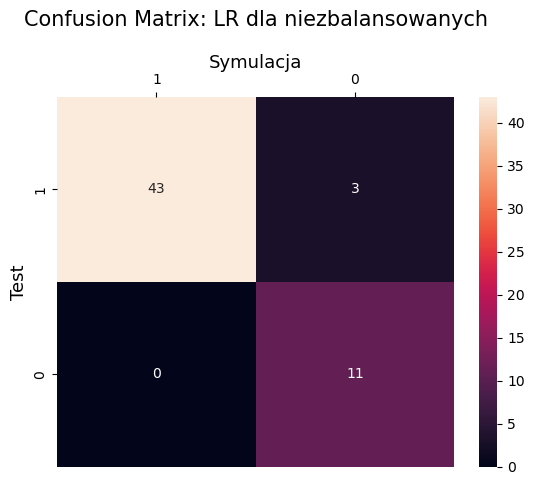

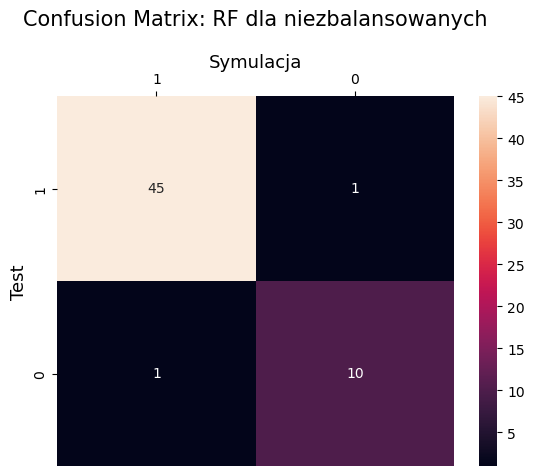

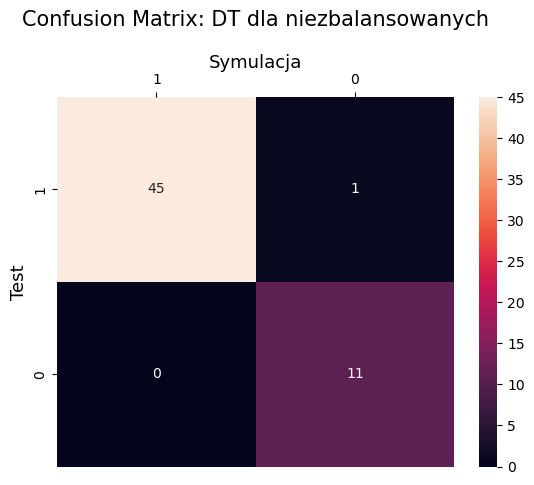

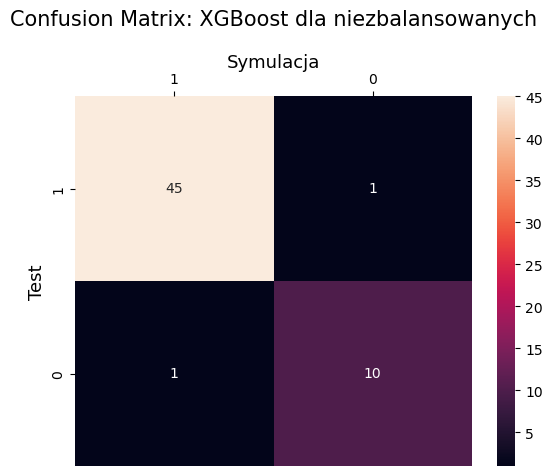

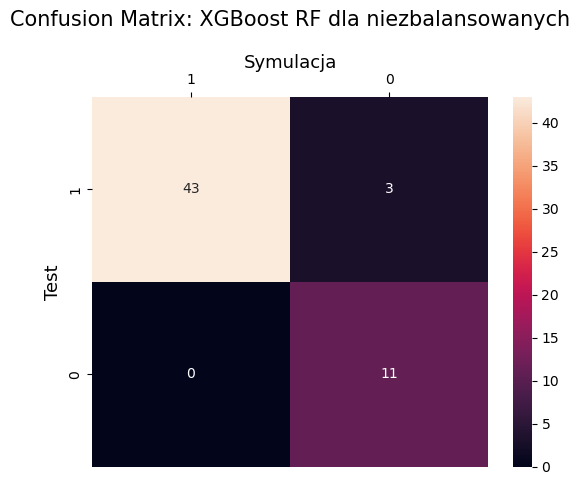

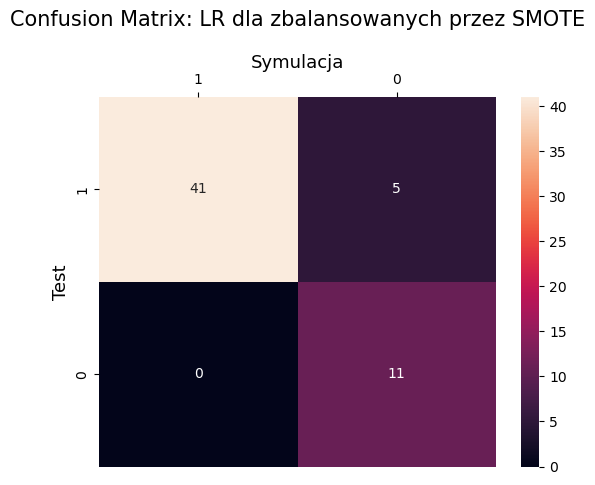

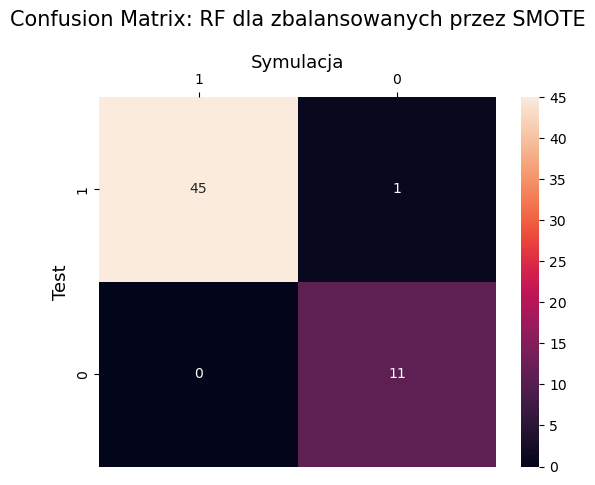

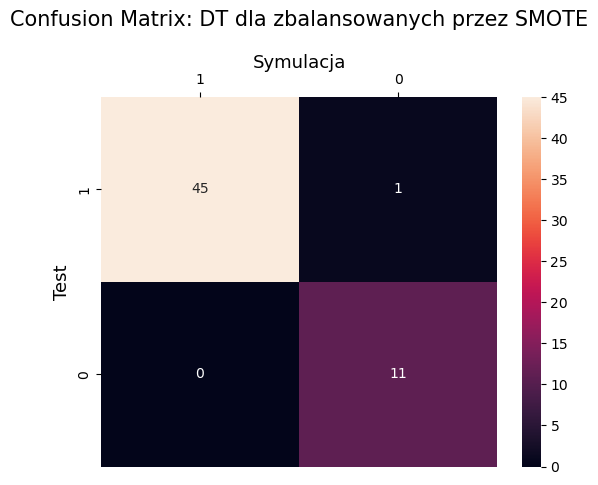

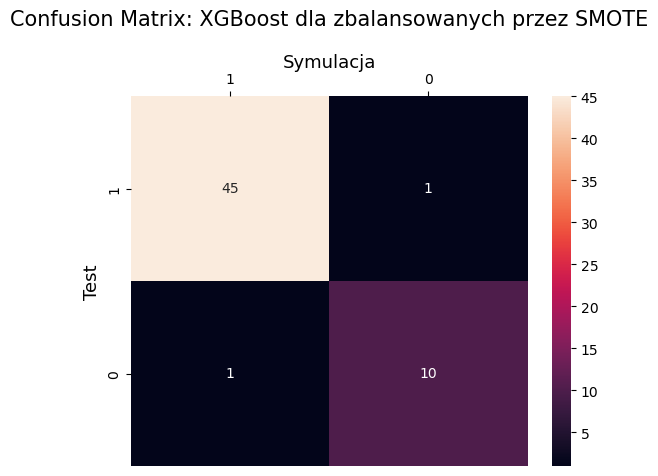

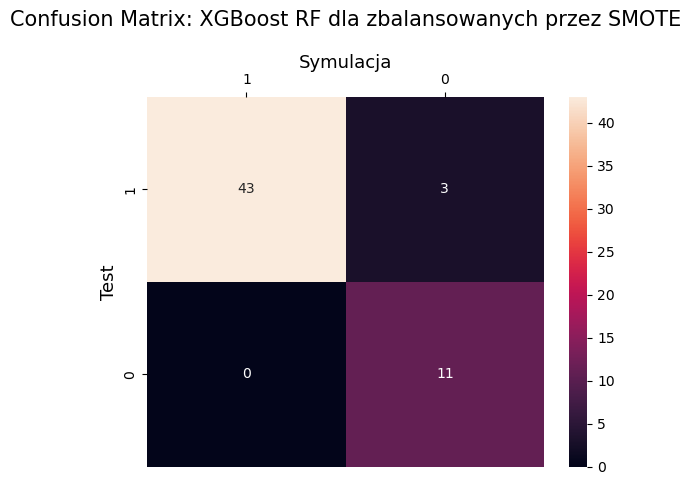

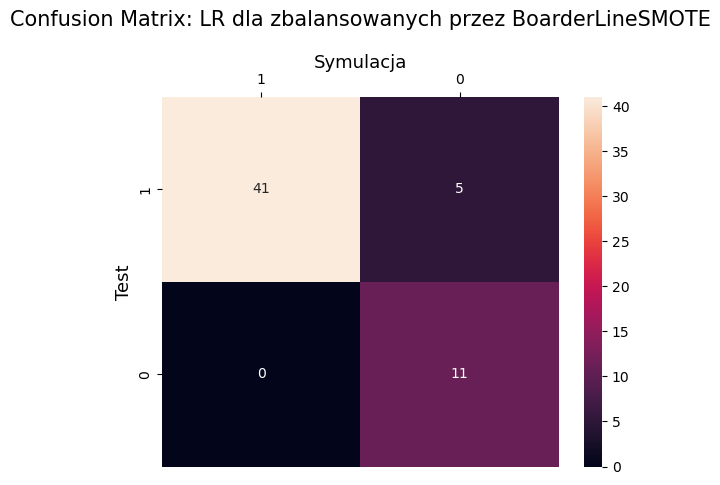

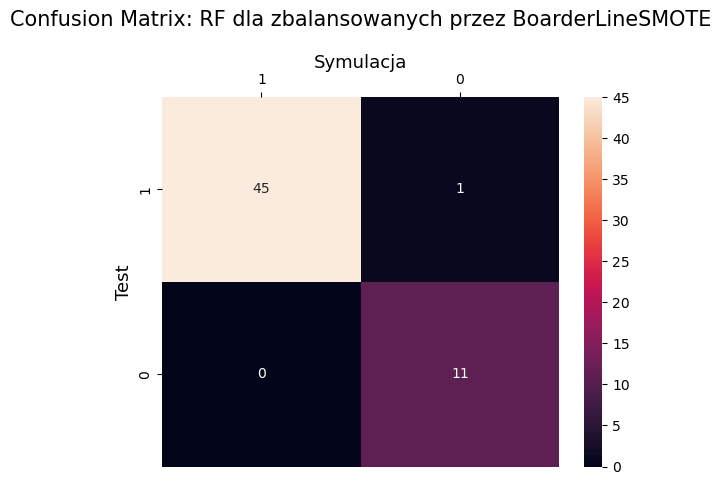

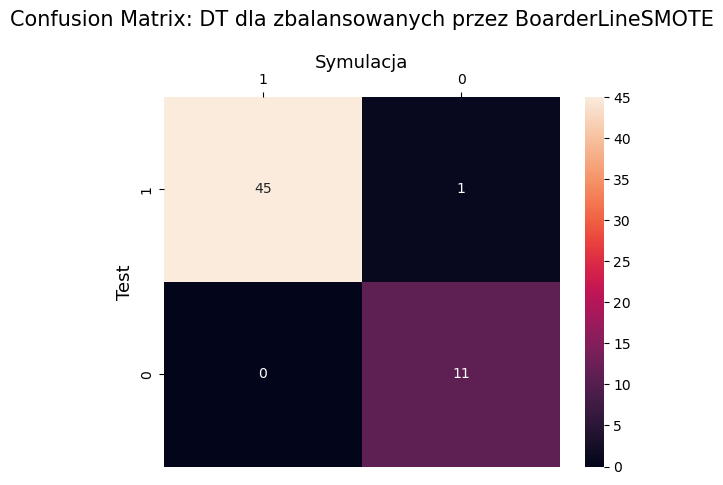

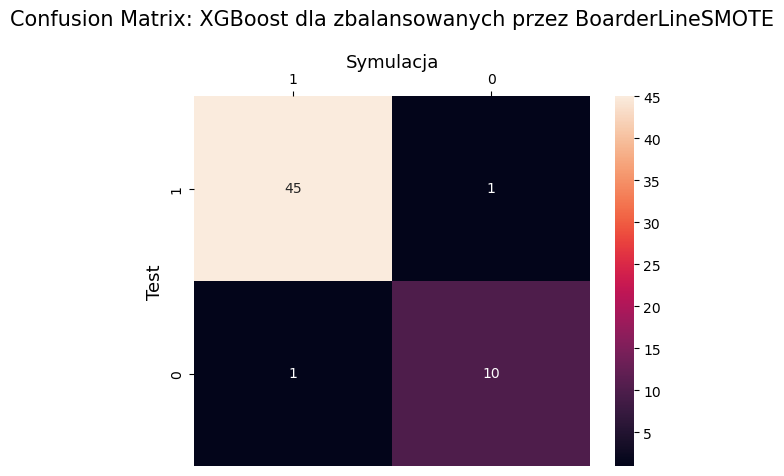

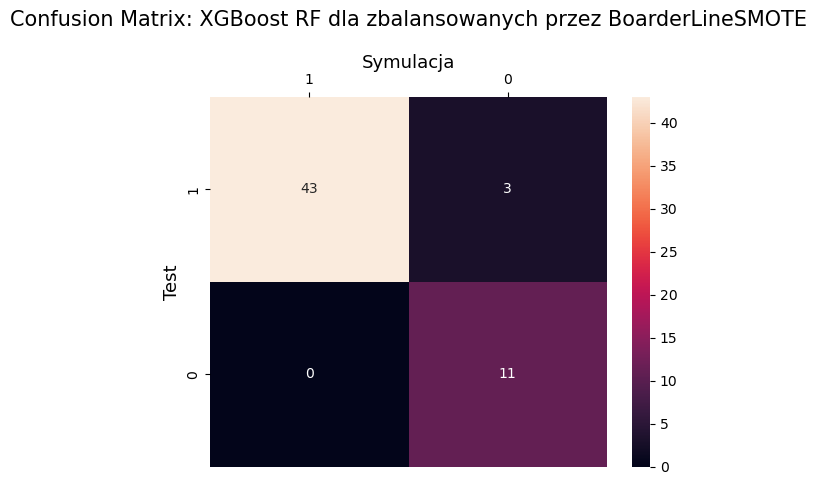

In [ ]:
conf_mat_LR = confusion_matrix(y_test, y_pred_LR)
conf_mat_RF = confusion_matrix(y_test, y_pred_RF)
conf_mat_DT = confusion_matrix(y_test, y_pred_DT)
conf_mat_XGB = confusion_matrix(y_test, y_pred_XGB)
conf_mat_XGB_RF = confusion_matrix(y_test, y_pred_XGB_RF)

conf_mat_LR_SMOTE = confusion_matrix(y_test, y_pred_LR_SMOTE)
conf_mat_RF_SMOTE = confusion_matrix(y_test, y_pred_RF_SMOTE)
conf_mat_DT_SMOTE = confusion_matrix(y_test, y_pred_DT_SMOTE)
conf_mat_XGB_SMOTE = confusion_matrix(y_test, y_pred_XGB_SMOTE)
conf_mat_XGB_RF_SMOTE = confusion_matrix(y_test, y_pred_XGB_RF_SMOTE)

conf_mat_LR_BrdSMOTE = confusion_matrix(y_test, y_pred_LR_BrdSMOTE)
conf_mat_RF_BrdSMOTE = confusion_matrix(y_test, y_pred_RF_BrdSMOTE)
conf_mat_DT_BrdSMOTE = confusion_matrix(y_test, y_pred_DT_BrdSMOTE)
conf_mat_XGB_BrdSMOTE = confusion_matrix(y_test, y_pred_XGB_BrdSMOTE)
conf_mat_XGB_RF_BrdSMOTE = confusion_matrix(y_test, y_pred_XGB_RF_BrdSMOTE)

conf_matrices = [
    conf_mat_LR, conf_mat_DT, conf_mat_RF, conf_mat_XGB, conf_mat_XGB_RF,
    
    conf_mat_LR_SMOTE, conf_mat_DT_SMOTE, conf_mat_RF_SMOTE, conf_mat_XGB_SMOTE, conf_mat_XGB_RF_SMOTE,
    
    conf_mat_LR_BrdSMOTE, conf_mat_DT_BrdSMOTE, conf_mat_RF_BrdSMOTE, conf_mat_XGB_BrdSMOTE, conf_mat_XGB_RF_BrdSMOTE   
]
model_names = [
    "LR dla niezbalansowanych", "RF dla niezbalansowanych", "DT dla niezbalansowanych", "XGBoost dla niezbalansowanych", "XGBoost RF dla niezbalansowanych",
    
    "LR dla zbalansowanych przez SMOTE", "RF dla zbalansowanych przez SMOTE", "DT dla zbalansowanych przez SMOTE",  "XGBoost dla zbalansowanych przez SMOTE", "XGBoost RF dla zbalansowanych przez SMOTE",
   
    "LR dla zbalansowanych przez BoarderLineSMOTE", "RF dla zbalansowanych przez BoarderLineSMOTE", "DT dla zbalansowanych przez BoarderLineSMOTE",  "XGBoost dla zbalansowanych przez BoarderLineSMOTE", "XGBoost RF dla zbalansowanych przez BoarderLineSMOTE",  
]
for conf_mat, model_name in zip(conf_matrices, model_names):
    sns.heatmap(conf_mat, annot=True, xticklabels=["1", "0"], yticklabels=["1", "0"])
    plt.ylabel("Test", fontsize=13)
    plt.title(f"Confusion Matrix: {model_name}", fontsize=15, pad=20)
    plt.gca().xaxis.set_label_position("top")
    plt.xlabel("Symulacja", fontsize=13)
    plt.gca().xaxis.tick_top()
    #plt.savefig(f'D:\\ml\\xgboost-main\\reports\\conf matrix\\{model_name}.png', bbox_inches="tight", dpi=200)     
    plt.show()
    plt.close()  

### Drzewa decyzyjne

In [ ]:
# TREE dla DT
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), dpi=800)
tree.plot_tree(model_DT, feature_names=df.columns.tolist(), filled=True, fontsize=10)
plt.title("Decision Tree from Decision Tree with unbalanced data")
# fig.savefig('../reports/Results/tree/tree_DT_1.png')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), dpi=800)
plot_tree(model_DT_SMOTE, feature_names=df.columns.tolist(), filled=True, fontsize=10)
plt.title("Decision Tree from Decision Tree with balanced data")
# fig.savefig('../reports/Results/tree/tree_DT_SMOTE_1.png')

# TREE dla RF
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), dpi=800)
tree.plot_tree(
    model_RF.estimators_[0], feature_names=df.columns.tolist(), filled=True, fontsize=10
)
plt.title("First Decision Tree from Random Forest with unbalanced data")
# fig.savefig('../reports/Results/tree/tree_RF.png')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), dpi=800)
tree.plot_tree(
    model_RF_SMOTE.estimators_[0],
    feature_names=df.columns.tolist(),
    filled=True,
    fontsize=10,
)
plt.title("First Decision Tree from Random Forest with balanced data")
# fig.savefig('../reports/Results/tree/tree_RF_SMOTE.png')

# PC boom boom
""" fig, axes = plt.subplots(nrows = 1,ncols = 20,figsize = (60,10), dpi=900)
for index in range(0, 20):
    tree.plot_tree(model_RF.estimators_[index],
                   feature_names=dtrain.columns.tolist(), 
                   filled = True,
                   ax = axes[index],
                   fontsize=4)

    axes[index].set_title('Estimator: ' + str(index), fontsize = 10)
fig.savefig('../reports/Results/tree/tree_1_RF7.png') """

NameError: name 'dtrain' is not defined